# Project: Predict Customer Churn at Beta Bank

## Introduction 
Problem: 
Beta Bank is experiencing a constant loss of customers, which has a negative impact on its finances. It has been identified that retaining existing customers is more profitable than acquiring new ones, which is why there is a need to develop a predictive model capable of identifying those customers most likely to leave the bank in the near future.

Aim:
The main goal of this project is to build a machine learning model that can accurately predict whether a Beta Bank customer will leave the bank in the short term. The model must achieve an F1 value of at least 0.59 to be considered successful. Furthermore, the performance of the model will be evaluated using the AUC-ROC metric and compared with the F1 value.

## Import of libraries

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
import statistics

## Data loading and browsing

In [73]:
#Load the data file
df = pd.read_csv('Churn.csv')
#Print the first 5 rows of the Dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [74]:
#Analyze general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [75]:
#generate descriptive statistics for the numerical columns in the DataFrame 
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [76]:
# This line replaces all missing values (NaN) in the 'Tenure' column of the DataFrame 'df' with the median value of the 'Tenure' column. 
df['Tenure'].fillna(statistics.median(df['Tenure']), inplace=True) 

/var/folders/zz/1lh114c55jj9tjb2vztk4z340000gq/T/ipykernel_31861/2842247454.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tenure'].fillna(statistics.median(df['Tenure']), inplace=True)


In [77]:
#Analyze general information to validate the previous step
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## Analisis de los datos

In [78]:
# Group the DataFrame by 'Geography' and 'Gender', and sum the 'Exited' column
geo_counts = df.groupby(['Geography', 'Gender'])['Exited'].sum().unstack()
geo_counts

Gender,Female,Male
Geography,,
France,460,350
Germany,448,366
Spain,231,182


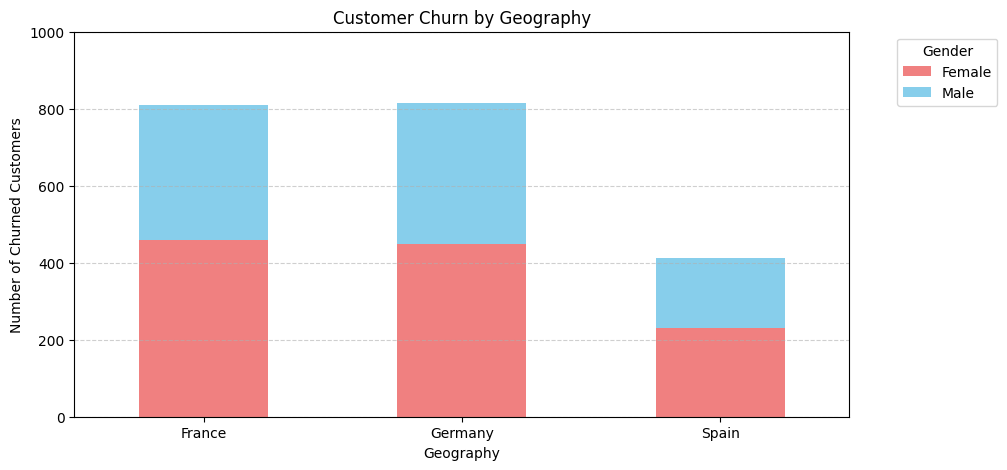

In [79]:
# Group data by Geography and Gender, then sum the 'Exited' count for each combination
ggeo_counts = df.groupby(['Geography', 'Gender'])['Exited'].sum().unstack()

# Create a bar chart to visualize the data
geo_counts.plot(kind="bar", 
                title='Customer Churn by Geography',  # Title in English
                xlabel='Geography', 
                ylabel='Number of Churned Customers',  # Y-axis label in English
                stacked=True, 
                color=['lightcoral', 'skyblue'], 
                figsize=(10, 5))

# Add legend with title and position it outside the plot area
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.2, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Set y-axis limits to avoid negative values and adjust upper limit if needed
plt.ylim(0, 1000)

# Add gridlines to the y-axis with dashed line style and partial transparency
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.show()

## Data preparation

In [80]:
#Delete columns that are not related to the target
df = df.drop(['RowNumber','Surname'], axis=1)

In [81]:
#Obtain Gender dummies
var_categorical = ['Gender', 'Geography']
df = pd.get_dummies(df, columns=var_categorical)

In [82]:
# Select features (all columns except the target variable)
features = df.drop(columns=['Exited'],axis=1) 

# Select the target variable (column to predict)
target = df['Exited']

It was determined that the missing data in the Tenure field may be due to:
Missing data: Information was simply not recorded or was lost during the data collection process.
New customers: Customers who have just opened an account may not yet have a history of fixed deposits.
Different products: The client could have other banking products without fixed-term deposits

## Examine class balance. Train the model without considering imbalance. Briefly describe your findings.

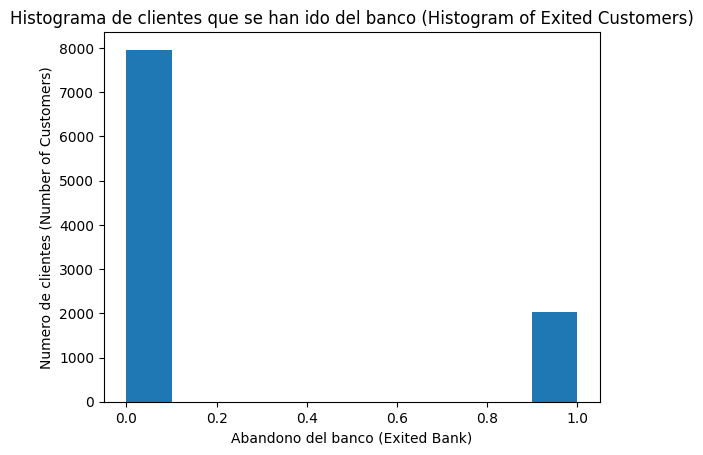

In [83]:
# Create a histogram to visualize the distribution of the 'Exited' feature in the DataFrame 'df'
plt.hist(df['Exited'])

# Set the title of the plot for clarity
plt.title('Histograma de clientes que se han ido del banco (Histogram of Exited Customers)')

# Label the x-axis to indicate what it represents
plt.xlabel('Abandono del banco (Exited Bank)')

# Label the y-axis to indicate what it represents
plt.ylabel('Numero de clientes (Number of Customers)')

# Display the plot
plt.show()

In [84]:
#first separation of the data set
# Split the data into training and validation/test sets
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, 
    target, 
    test_size=0.25, 
    random_state=12345
)

In [85]:
#second separation of the data set
# Split the data into training and testing sets 
features_test, features_valid, target_test, target_valid = train_test_split(
    features_valid_test,
    target_valid_test,
    test_size=0.25,
    random_state=12345
    )

In [86]:
# Initialize variables to track best score and best number of estimators
best_score = 0
best_est = 0

# Loop through a range of n_estimators for Random Forest Classifier
for est in range(1, 25):
    # Create a Random Forest Classifier model with current n_estimators
    model = RandomForestClassifier(random_state=12345, n_estimators=est)

    # Train the model on the training data
    model.fit(features_train, target_train)

    # Make predictions on the validation data
    predict1 = model.predict(features_valid)

    # Calculate the accuracy score for the predictions
    accuracy = accuracy_score(target_valid, predict1)

    # Check if current accuracy is better than the best score so far
    if accuracy > best_score:
        # Update best score and corresponding number of estimators
        best_score = accuracy
        best_est = est

# Print the results
print('Best score:', best_score, 'with a n_estimators of:', best_est)
print('F1 score:', f1_score(target_valid, predict1))

Best score: 0.8576 with a n_estimators of: 16
F1 score: 0.5074626865671642


In [87]:
# Initialize variables to track best score and depth
best_score = 0
best_depth = 0

# Iterate through different tree depths
for depth in range(1, 6):
  # Create a DecisionTreeClassifier model with current depth
  model = DecisionTreeClassifier(max_depth=depth, random_state=12345)

  # Train the model on the training data
  model.fit(features_train, target_train)

  # Make predictions on the validation data
  predict2 = model.predict(features_valid)

  # Calculate accuracy score for the predictions
  accuracy = accuracy_score(target_valid, predict2)

  # Check if current accuracy is better than the previous best
  if accuracy > best_score:
    # Update best score and depth if current model is better
    best_score = accuracy
    best_depth = depth

# Print the best score and corresponding depth
print('Best score:', best_score, 'with a max_depth of:', best_depth)

# Calculate and print F1 score for the best model on validation data
print('F1 score:', f1_score(target_valid, predict2))

Best score: 0.8608 with a max_depth of: 5
F1 score: 0.5876777251184835


In [88]:
# Initialize variables to track the best model performance
best_result = 10000  # Large initial value for mean squared error (MSE)
best_depth = 0

# Loop through different tree depths (hyperparameter tuning)
for depth in range(1, 50):
    # Create a DecisionTreeRegressor model with current depth
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)

    # Train the model on the training data
    model.fit(features_train, target_train)

    # Make predictions on the validation data
    predict3 = model.predict(features_valid)

    # Calculate the mean squared error (MSE) between predictions and actual values
    result = mean_squared_error(target_valid, predict3) ** 0.5  # Square root for RMSE

    # Check if current model has lower MSE than previous best
    if result < best_result:
        best_result = result  # Update best MSE
        best_depth = depth  # Update best depth

# Print results after evaluating all depths
print('Best score (RMSE):', best_result, 'with a max_depth of:', best_depth)
print('F1-score:', f1_score(target_valid, predict3))  # Additional evaluation metric

Best score (RMSE): 0.3107445279484463 with a max_depth of: 6
F1-score: 0.5393258426966293


In [89]:
# Create a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=12345)

# Train the model on the training data
model.fit(features_train, target_train)

# Use the trained model to make predictions on the validation data
predicted_value = model.predict(features_valid)

# Evaluate the model's performance
print('Accuracy score:', accuracy_score(target_valid, predicted_value))
print('F1 score:', f1_score(target_valid, predicted_value))

Accuracy score: 0.7952
F1 score: 0.0


In [90]:
print(confusion_matrix(target_valid,predict1))

[[475  22]
 [ 77  51]]


The precise model is the RandomForestClassifier with a maximum precision of 0.85
Under this model, a prediction was obtained in which the majority of the predicted responses are true negatives, although we still have several false negatives. Evaluating the precision and recall of the model, we obtain an F1 value of 0.53.

## Improve model quality. Make sure you use at least two approaches to correct class imbalance. It uses training and validation sets to find the best model and the best set of parameters. Train different models on the training and validation sets. Find the best. Briefly describe your findings.

Because we have many false negative values, we will apply an oversampling technique to increase the positive values ​​and thus balance the data.

In [91]:
def upsample(features, target, repeat):
    """
    This function upsamples the minority class in a binary classification dataset.

    Args:
        features: DataFrame containing the features.
        target: Series containing the target variable (binary labels).
        repeat: The number of times to repeat the minority class.

    Returns:
        A tuple containing the upsampled features and target.
    """
    
    features_zeros = features[target == 0]  # Select features where target is 0 (majority class)
    features_ones = features[target == 1]  # Select features where target is 1 (minority class)
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Repeat the minority class samples 'repeat' times
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    # Shuffle the upsampled data to avoid introducing bias
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

# Upsample the training data with a repetition factor of 10
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

In [92]:
# Initialize variables to track best score and estimator
best_score = 0
best_est = 0

# Loop through a range of n_estimators for Random Forest
for est in range(1, 25):
  # Create a Random Forest model with current n_estimators
  model = RandomForestClassifier(random_state=12345, n_estimators=est)

  # Train the model on the upsampled features and target data
  model.fit(features_upsampled, target_upsampled)

  # Make predictions on the validation set
  predicted_valid = model.predict(features_valid)

  # Calculate accuracy score for the validation set
  accuracy = accuracy_score(target_valid, predicted_valid)

  # Check if current accuracy is better than the best score so far
  if accuracy > best_score:
    # Update best score and corresponding number of estimators
    best_score = accuracy
    best_est = est

# Print the best score and corresponding number of estimators
print('Best score:', best_score, 'with n_estimators of:', best_est)

# Evaluate the final model on the validation set using accuracy score and F1 score
print('Accuracy score:', accuracy_score(target_valid, predicted_valid))
print('F1 score:', f1_score(target_valid, predicted_valid))

Best score: 0.864 with n_estimators of: 20
Accuracy score: 0.8592
F1 score: 0.6106194690265487


In [93]:
# Initialize variables to track best score and depth
best_score = 0
best_depth = 0

# Loop through a range of decision tree depths (1 to 5)
for depth in range(1, 6):
  # Create a DecisionTreeClassifier model with current depth
  model = DecisionTreeClassifier(max_depth=depth, random_state=12345)

  # Train the model on the upsampled features and target variables
  model.fit(features_upsampled, target_upsampled)

  # Make predictions on the validation set using the trained model
  predict2 = model.predict(features_valid)

  # Calculate accuracy score for the predictions on the validation set
  accuracy = accuracy_score(target_valid, predict2)

  # Check if current accuracy is better than the previous best score
  if accuracy > best_score:
    # Update best score and best depth if current accuracy is higher
    best_score = accuracy
    best_depth = depth

# Print the best score achieved and the corresponding decision tree depth
print('Best score:', best_score, 'with a max_depth of:', best_depth)

# Calculate and print the F1 score for the best model on the validation set
print('F1:', f1_score(target_valid, predict2))

Best score: 0.6832 with a max_depth of: 2
F1: 0.5154185022026432


In [94]:
# Initialize variables to track best performance
best_result = 10000  # Large initial value for mean squared error
best_depth = 0

# Loop through different tree depths (hyperparameter tuning)
for depth in range(1, 50):
    # Create a DecisionTreeRegressor model with current depth
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)

    # Train the model on the upsampled features and target data
    model.fit(features_upsampled, target_upsampled)

    # Make predictions on the validation set using the trained model
    predict3 = model.predict(features_valid)

    # Calculate the mean squared error (MSE) between predictions and actual values
    result = mean_squared_error(target_valid, predict3)**0.5  # Square root for RMSE

    # Check if current result is better than the previous best
    if result < best_result:
        best_result = result  # Update best score
        best_depth = depth  # Update best depth

# Print the results
print('Best score (RMSE):', best_result, 'with a max_depth of:', best_depth)
print('F1 score:', f1_score(target_valid, predict3))

Best score (RMSE): 0.43801655608134327 with a max_depth of: 26
F1 score: 0.49206349206349204


In [95]:
# Define and train a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_upsampled, target_upsampled)

# Make predictions on the validation set
predicted_value = model.predict(features_valid)

# Evaluate model performance
print('Accuracy score:', accuracy_score(target_valid, predicted_value))
print('F1 score:', f1_score(target_valid, predicted_value))

Accuracy score: 0.2048
F1 score: 0.3399734395750332


We apply the subsampling technique to balance the data.

In [96]:
def downsample(features, target, fraction):
    """
    Downsamples the majority class in a binary classification dataset.

    Args:
        features: DataFrame containing the features.
        target: Series containing the target variable (binary labels).
        fraction: Fraction of the majority class to keep in the downsampled dataset.

    Returns:
        A tuple containing the downsampled features and target.
    """

    # Filter data based on target class
    features_zeros = features[target == 0] 
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Downsample the majority class (assumed to be class 0)
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]) 
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    # Shuffle the downsampled data to ensure randomness
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

# Apply downsampling to the training data
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

In [97]:
# Initialize variables to track best score and estimator
best_score = 0
best_est = 0

# Loop through a range of n_estimators for Random Forest
for est in range(1, 25):
  # Create a Random Forest model with current n_estimators
  model = RandomForestClassifier(random_state=12345, n_estimators=est)

  # Train the model on the downsampled features and target data
  model.fit(features_downsampled, target_downsampled)

  # Make predictions on the validation set
  predicted_valid = model.predict(features_valid)

  # Calculate the accuracy score for the validation set
  accuracy = accuracy_score(target_valid, predicted_valid)

  # Check if current accuracy is better than the best score so far
  if accuracy > best_score:
    # Update best score and corresponding n_estimators
    best_score = accuracy
    best_est = est

# Print the best score and n_estimators found during the loop
print('Best score:', best_score, 'with n_estimators of:', best_est)

# Evaluate the final model using accuracy score on validation set
print('Final accuracy score:', accuracy_score(target_valid, predicted_valid))

# Evaluate the final model using F1 score on validation set
print('F1 score:', f1_score(target_valid, predicted_valid))

Best score: 0.6848 with n_estimators of: 2
Final accuracy score: 0.6224
F1 score: 0.49787234042553197


In [98]:
# Initialize variables to track best score and depth
best_score = 0
best_depth = 0

# Loop through a range of tree depths (1 to 5)
for depth in range(1, 6):
  # Create a DecisionTreeClassifier model with current depth and random state
  model = DecisionTreeClassifier(max_depth=depth, random_state=12345)

  # Train the model on the downsampled features and target variables
  model.fit(features_downsampled, target_downsampled)

  # Make predictions on the validation set using the trained model
  predict2 = model.predict(features_valid)

  # Calculate the accuracy score for the predictions on the validation set
  accuracy = accuracy_score(target_valid, predict2)

  # Check if the current accuracy is better than the best score seen so far
  if accuracy > best_score:
    # Update best score and depth if the current model performs better
    best_score = accuracy
    best_depth = depth

# Print the best score and corresponding depth
print('Best score:', best_score, 'with a max_depth of:', best_depth)

# Calculate and print the F1 score on the validation set using the best model
print('F1:', f1_score(target_valid, predict2))

Best score: 0.6832 with a max_depth of: 2
F1: 0.4957264957264957


In [99]:
# Initialize variables to track best performance
best_result = 10000  # Large initial value to ensure first iteration updates
best_depth = 0

# Loop through a range of tree depths (hyperparameter tuning)
for depth in range(1, 50):
    # Create a decision tree regression model with current depth
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)

    # Train the model on the downsampled features and target variables
    model.fit(features_downsampled, target_downsampled)

    # Make predictions on the validation set using the trained model
    predict3 = model.predict(features_valid)

    # Calculate the root mean squared error (RMSE) between predictions and actual values
    result = mean_squared_error(target_valid, predict3)**0.5

    # Track the best model so far based on lowest RMSE
    if result < best_result:
        best_result = result
        best_depth = depth

# Print the best achieved RMSE and corresponding hyperparameter (depth)
print('Best RMSE:', best_result, 'with a max_depth of:', best_depth)

# Additionally calculate and print F1 score (optional for regression models)
print('F1 Score:', f1_score(target_valid, predict3))

Best RMSE: 0.5125613349038769 with a max_depth of: 5
F1 Score: 0.4622030237580994


In [100]:
# Define and train a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_downsampled, target_downsampled)

# Make predictions on the validation set
predicted_value = model.predict(features_valid)

# Evaluate model performance
print('Accuracy score:', accuracy_score(target_valid, predicted_value))
print('F1 score:', f1_score(target_valid, predicted_value))

Accuracy score: 0.2048
F1 score: 0.3399734395750332


## Threshold adjustment

The balancing methods Oversampling and Undersampling were applied, then the models were trained: RandomForestClassifier, DecisionTreeClassifier, DecisionTreeRegressor and LogisticRegression for both methods and it was obtained that for the RandomForestClassifier model the F1 value was improved by 0.02 using half of the oversampling method. sampling.

## Take the final test

In [101]:
# Initialize variables to track best score and corresponding number of estimators
best_score = 0
best_est = 0

# Loop through a range of n_estimators for Random Forest Classifier
for est in range(1, 25):
    # Create a Random Forest Classifier model with current n_estimators
    model = RandomForestClassifier(random_state=12345, n_estimators=est)

    # Train the model on the upsampled features and target variables
    model.fit(features_upsampled, target_upsampled)

    # Predict labels for the testing set using the trained model
    predicted_test = model.predict(features_test)

    # Calculate accuracy score to evaluate model performance
    accuracy = accuracy_score(target_test, predicted_test)

    # Check if current accuracy is better than the previous best score
    if accuracy > best_score:
        # Update best score and corresponding number of estimators
        best_score = accuracy
        best_est = est

# Print results after evaluating all models
print('Best score:', best_score, 'with n_estimators of:', best_est)

# Additional model evaluation metrics (using previously predicted labels)
print('Predicted labels:', predicted_test)
print('Accuracy score:', accuracy_score(target_test, predicted_test))
print('F1 score:', f1_score(target_test, predicted_test))
print('Confusion matrix:\n', confusion_matrix(target_test, predicted_test))


Best score: 0.8442666666666667 with n_estimators of: 20
Predicted labels: [0 1 0 ... 0 0 1]
Accuracy score: 0.8410666666666666
F1 score: 0.5706051873198847
Confusion matrix:
 [[1379   89]
 [ 209  198]]


The main objective of this project was to develop a machine learning model capable of predicting with high precision whether a Beta Bank client will leave the entity (churn). To do this, a data set containing detailed information about customers was used, including demographic, behavioral and financial variables.
The dataset was divided into test, validation and training sets. After that, models were trained and predicted without taking into account the class balance and later the class balance was corrected and it was obtained that for the RandomForestClassifier model the F1 value was improved by 0.02 using the oversampling method.
In conclusion, the model developed in this project provides a valuable tool to predict customer churn at Beta Bank. The results obtained demonstrate the importance of addressing class imbalance and selecting the appropriate model for this type of problems. However, it is essential to continue researching and improving the model to ensure its long-term effectiveness.